<a href="https://colab.research.google.com/github/Sanjayyykumar/Sanjayyykumar/blob/main/Admission_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Admission Prediction -  Sanjay kumar S

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('data.csv')
data=data.drop(columns=['Serial No.'])


In [6]:
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [7]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
# checking for missing data
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
# rename some columns
Data=data.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'university_Rating','Chance of Admit ':'Chance_of_Admit'},inplace=True)


In [11]:
data.describe()

,GRE,TOEFL,university_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


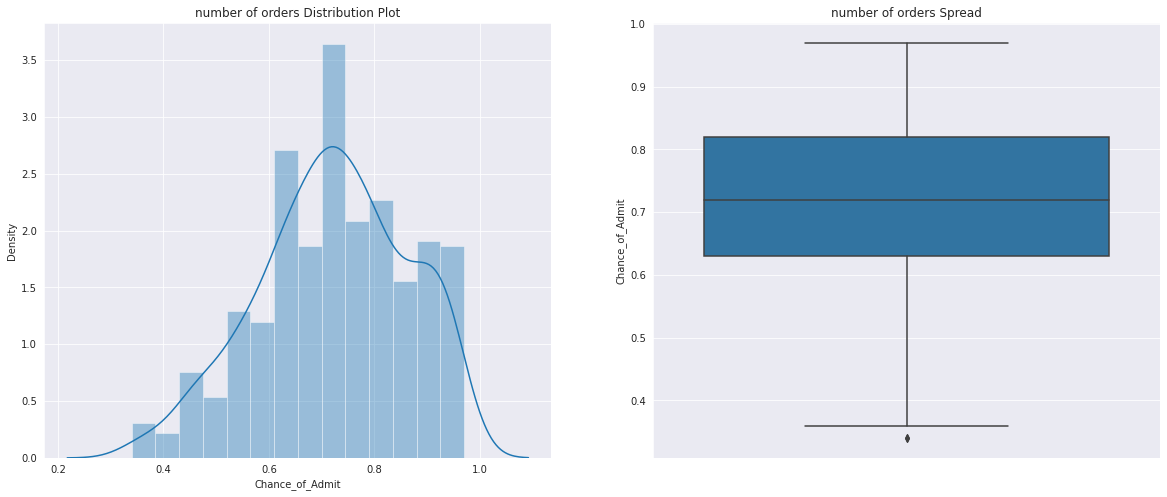

In [12]:
# visualize the target variable
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.Chance_of_Admit)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


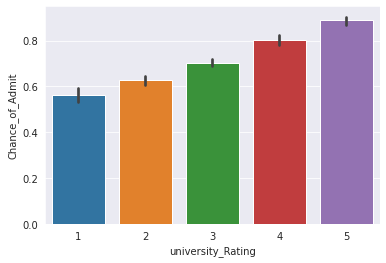

In [13]:
sb.barplot(data.university_Rating,data.Chance_of_Admit)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


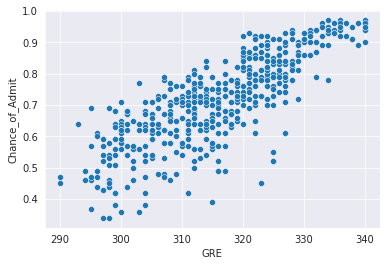

In [14]:
sb.scatterplot(data.GRE,data.Chance_of_Admit)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


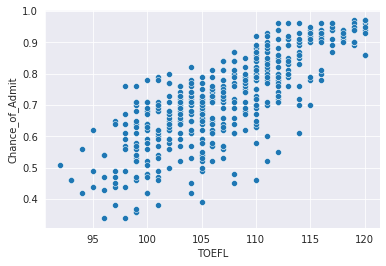

In [15]:
sb.scatterplot(data.TOEFL,data.Chance_of_Admit)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


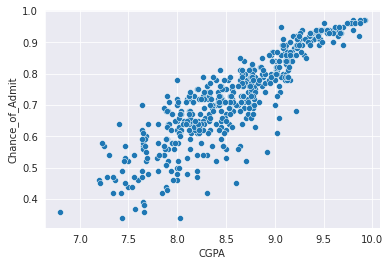

In [16]:
sb.scatterplot(data.CGPA,data.Chance_of_Admit)

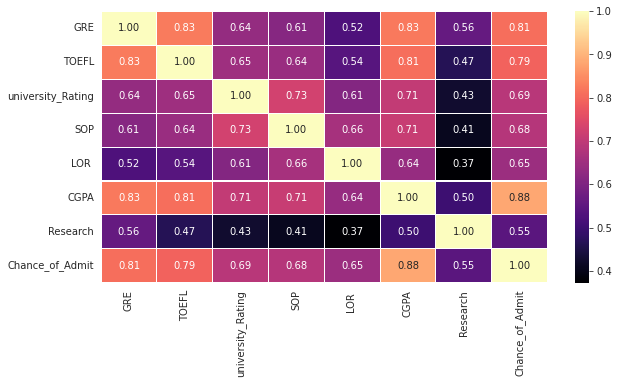

In [17]:
# looking for relevant independent variable

plt.figure(figsize=(10,5))
cr = data.corr()
sb.heatmap(cr, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [18]:
(data.corr()**2)["Chance_of_Admit"].sort_values(ascending = False)[1:]

CGPA                 0.778652
GRE                  0.656668
TOEFL                0.627625
university_Rating    0.476283
SOP                  0.468043
LOR                  0.416495
Research             0.297975
Name: Chance_of_Admit, dtype: float64

In [19]:
# Performing some transformation 
data['Chance_of_Admit']=data['Chance_of_Admit']**2

In [20]:
# remove some outliers
## Deleting those some outliers. 
# previous_data = data.copy()
data = data[data.Chance_of_Admit >0.40]
data.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


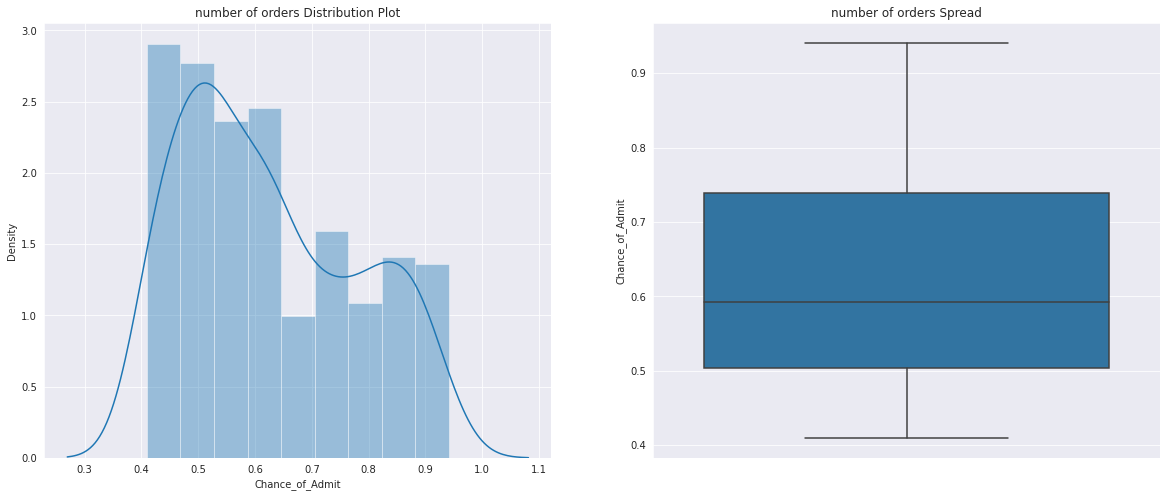

In [21]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('number of orders Distribution Plot')
sb.distplot(data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('number of orders Spread')
sb.boxplot(y=data.Chance_of_Admit)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


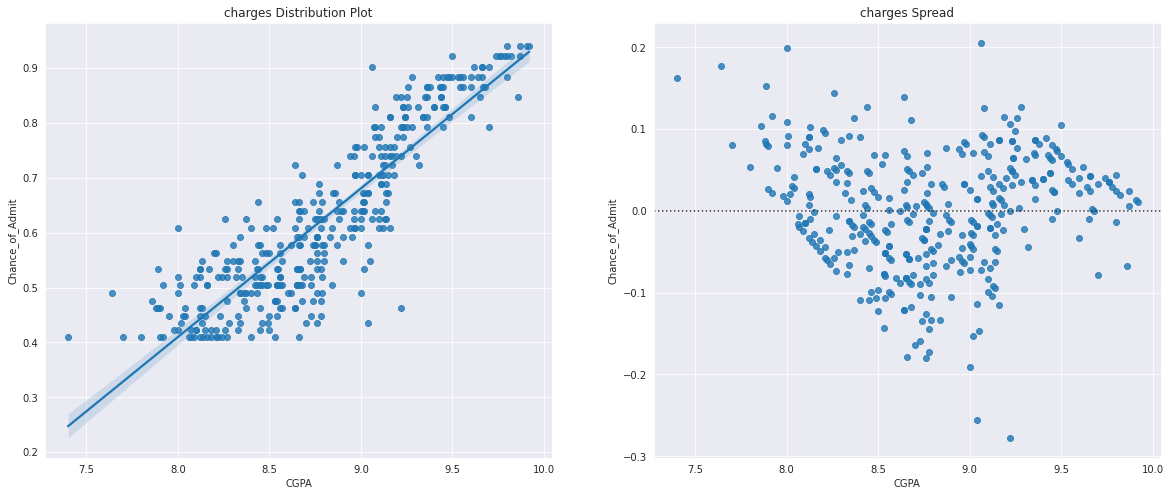

In [22]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.CGPA, y=data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.CGPA, data.Chance_of_Admit)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


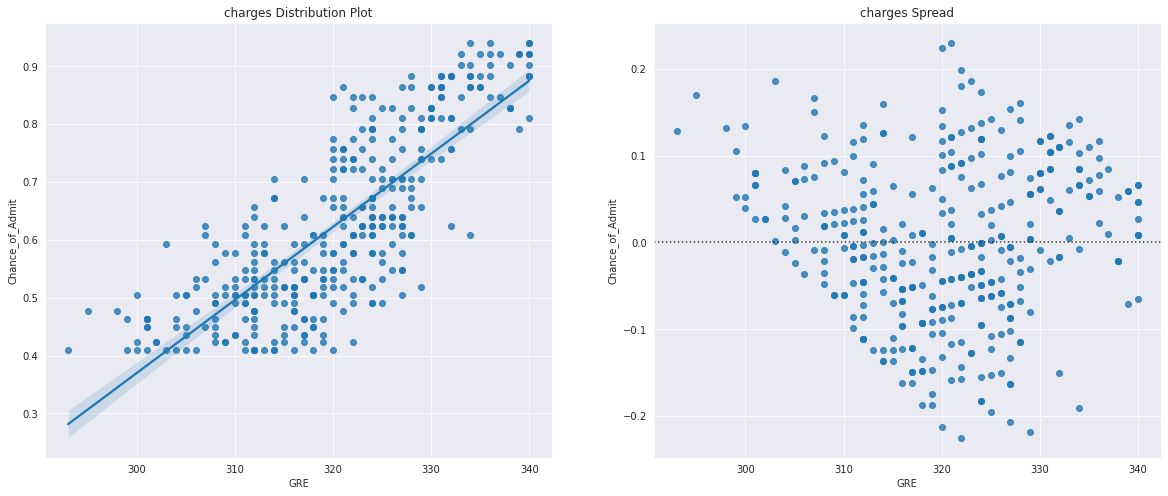

In [23]:
plt.figure(figsize=(20,8))
sb.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('charges Distribution Plot')
sb.regplot(x=data.GRE, y=data.Chance_of_Admit)

plt.subplot(1,2,2)
plt.title('charges Spread')
sb.residplot(data.GRE, data.Chance_of_Admit)

plt.show()

In [24]:
data.columns

Index(['GRE', 'TOEFL', 'university_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [25]:
# data=data.drop(columns=['SOP','LOR ','Research'],axis=1)

x = data.iloc[:, :-1].values
y = data.iloc[:, 7].values

In [26]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# using pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.61921189 0.13703767]


In [29]:
# Fitting linear regression Regression to the dataset
from sklearn.linear_model import LinearRegression
Lin_regressor = LinearRegression(normalize=True)
Lin_regressor.fit(X_train, y_train)
y_pred=Lin_regressor.predict(X_test)
y_train_pred=Lin_regressor.predict(X_train)

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, y_train_pred)))
from sklearn.metrics import r2_score
print("R2 score on the test set:",r2_score(y_test, y_pred)*100)
print("R2 score on the training set:",r2_score(y_train, y_train_pred)*100)

RMSE score on the test set: 0.06458636660278361
RMSE score on the training set: 0.06203539516763837
R2 score on the test set: 82.29216489905946
R2 score on the training set: 83.42041387182823


In [31]:
from sklearn.ensemble import RandomForestRegressor
RDF_regressor = RandomForestRegressor(n_estimators = 30, random_state = 0)
RDF_regressor.fit(X_train, y_train)
y_pred2=RDF_regressor.predict(X_test)
y_train_pred2=RDF_regressor.predict(X_train)

In [32]:
print("RMSE score on the test set:",sqrt(mean_squared_error(y_test, y_pred2)))
print("RMSE score on the training set:",sqrt(mean_squared_error(y_train, y_train_pred2)))

print("R2 score on the test set:",r2_score(y_test, y_pred2)*100)
print("R2 score on the training set:",r2_score(y_train, y_train_pred2)*100)

RMSE score on the test set: 0.061646925488804565
RMSE score on the training set: 0.023924785311686174
R2 score on the test set: 83.86731677657461
R2 score on the training set: 97.53401359634837


In [33]:
# cross validation
# Applying k-Fold Cross Validation USED TO JUST IMPROVE THE MODEL PERFORMANCE(ACCURACY)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Lin_regressor, X = X_train, y = y_train, cv = 5)
print(accuracies.mean(),accuracies.std())

0.8205816154821275 0.04170276297974748


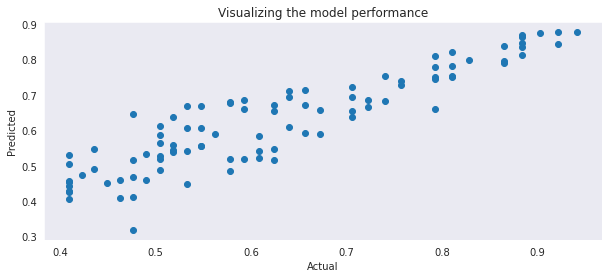

In [34]:
plt.figure(figsize=(10,4))
sb.set_style('darkgrid')
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Visualizing the model performance')
plt.grid()